# Matched filters and a radar-example

**Topics:**
- Applications of FIR filters in active sensor systems

**Learning goals:**
- Gain an understanding of convolution using more intricat filters.
- Be able to execute a series of signal processing operations and logical operations to arrive at a result.

**Python modules and notebook config:**

In [2]:
from numpy import sin, cos, pi, exp, empty, mean, abs, angle # Sentrale matematiske funksjoner
import numpy as np                          # Importer funksjonalitet fra numpy biblioteket med prefiks "np"
import scipy.signal as sig                  # Importerer signalbehandlingsmodulen til scipy
import matplotlib.pyplot as plt             # Importer pyplot modulen i matplotlib med prefiks "plt"

%matplotlib inline

### Introduction

One key insight to filter theory and impulse responses is that a digital filter will preserve signals, or signal components, which are similar in shape to the impulse response itself. Let's explore how this theory can explain the behavior of the two filters in problem 1:

* The impulse response of a *moving average filter* consists of a constant value for the duration of the impulse response. As such, a signal $x[n]$ which also has little to no variation from one sample to another is preserved through the filtering process, while oscillating signals are suppressed.
* The impulse response of a *first order difference filter* consists of two values with the same magnitude, but opposite signs ($+ / -$). Here, it is logical that signals which oscillate rapidly between positive/negative extremes (like the impulse response does) will be preserved, while a signal which has little or no change in value from one sample to the next will be suppressed.

More complicated filters also follow this "rule", so for instance a bandpass filter will have an approximately sinusoidal impulse response $h[n]$ with a frequency which matches the frequency of the passband. One particular problem where this principle is highly useful, is if we wish to identify the presence of a specific signal shape buried *somewhere* in a stream of sampled data from a radar antenna or a sonar hydrophone. In this case we can create a filter whose impulse response "matches" that of the radar/sonar pulse, and suppresses anything which doesn't follow this particular pattern.

<!--#### Observations on FIR Filters and Frequency Response
As mentioned in task 2, the *frequency content* of the impulse response $ h[n] $ for a filter is crucial for determining which frequencies the filter allows through. For example, if the impulse response $ h[n] $ mainly consists of a sinusoidal sequence $\cos\left(\hat{\omega}_0 \cdot n  + \theta\right) $, then the filter will primarily allow sinusoidal sequences with frequency $ \hat{\omega} = \hat{\omega}_0 $. An important implication of this is that digital signals $ x[n] $ with a waveform that "matches" the impulse response $ h[n] $ of a filter will pass through the filter, while signals that *do not* match the impulse response $ h[n] $ will be greatly attenuated.-->

#### Matched Filters
Mathematically, matched filters are defined as a process that maximizes the signal-to-noise ratio (SNR) in the output signal $ y[n] $ when a desired signal $ x_s[n] $ buried in noise passes through the filter. <!-- This type of filter is highly relevant in situations where it is important to determine the *presence* of a signal $ x_s[n] $ amidst noise. -->If $ x_s[n] $ is a signal with a finite length of $ N $ samples, the optimal impulse response $ h[n] $ for detecting this signal (i.e., the matched filter for $ x_s[n]$) is:

$$ h[n] = x_s[N-1-n] $$

This corresponds to *time-reversing (flipping)* of $x_s[n]$, followed by a *time shift* of $N-1$ samples, making it very easy to compute if the signal $x_s[n]$ is known. The animation below illustrates how the convolution between a pulse form $x_s[n] $ and the matched filter $ h[n] $ evolves. Notice how the output signal reaches maximum amplitude when the signal aligns perfectly with the impulse response.

![](Figurer/convAnimation.gif)

If you wish to learn more about matched filters, they are explained in detail in subchapter 7.3 of the book.

#### Radar

The main principle behind a radar system is that a pulse form is sent toward a target, and when this pulse form hits the target, it is reflected back to a receiver antenna of the radar. Disregarding Doppler shift for now, the received signal will consist of a delayed and attenuated version of the pulse form, plus any other noise and interference present. For a sampled pulse form $ x_{pulse}[n]$, this means that the received signal $ x_{rx}[n] $ can be mathematically modeled as

$$ x_{rx}[n] = \gamma \cdot x_{pulse}[n-K] + w_{noise}[n] $$

where $ \gamma $ is an attenuation factor, $ K $ is the delay in samples of the reflected pulse form, and $ w_{noise}[n] $ is an additive noise signal. In this task, we will assume that the samples in the noise signal $ w_{noise}[n]$ are random and follow a *normal distribution*. This is known as "white Gaussian noise."

<img src="Figurer/Radar.png" style="width: 60%; margin-left: 20%" />

To measure the distance to a reflective object, a matched filter can be used to produce a filtered return signal $ y[n] $ with significantly reduced noise, where the location of the pulse form should be clearly visible. Once the position of the reflected pulse form in time can be measured, the next step is to calculate the delay $ \tau_K $ of the reflected signal (in seconds) and then the distance to the object. Given the known speed of light $ c = 3 \cdot 10^8 $ m/s for radio waves, the distance $ d $ to the object is:

$$ d = c \cdot \frac{\tau_K}{2}\ \text{meters} $$

where the time delay $ \tau_K $ can be calculated using the system's sampling frequency $F_s$.

The data file `Lab4.mat` contains a log from such a radar system, including both the pulse form $x_{pulse}[n]$ that was used, the reflected signal $x_{rx}[n]$, and the system's sampling frequency $F_s$. The code cell below loads this data and plots the pulse form $x_{pulse}[n] $ and the signal $x_{rx}[n]$ in a figure:

<!--

### Introduksjon

#### Observasjoner om FIR-filtre og frekvensrespons
Som nevnt i oppgave 2 så er *frekvensinnholdet* til impulsresponsen $h[n]$ for et filter avgjørende for hvilke frekvenser dette filteret slipper gjennom. For eksempel dersom impulsresponen $h[n]$ består primært av en sinusformet sekvens $\cos\left(\hat{\omega}_0 \cdot n  + \theta\right)$ så vil filteret hovedsakelig slippe gjennom sinussekvenser med frekvens $\hat{\omega} = \hat{\omega}_0 $. En viktig implikasjon av dette er at digitale signal $x[n]$ med en bølgeform som "matcher" impulsresponsen $h[n]$ til et filter vil passere gjennom filteret, og signal som *ikke* matcher impulsresponsen $h[n]$ vil i mye større grad dempes. 

#### Matchede filtre
Matchede filtre defineres som en prosess som maksimerer signal-til-støyforhold (SNR) i utgangssignalet $y[n]$ når et ønsket signal $x_s[n]$ passerer gjennom filteret. Denne typen filtre er svært aktuelle i situasjoner der det er ønskelig å avgjøre graden av *tilstedeværelse* for et signal $x_s[n]$ omgitt av støy. Dersom $x_s[n]$ er et signal med en endelig lengde lik $N$ sampler, vil den optimale impulsresponsen $h[n]$ for deteksjon av dette signalet (altså det matchede filteret for $x_s[n]$) være:

$$h[n] = x_s[N-1-n]$$

Dette tilsvarer *tidsreversering (flipping)* av $x_s[n]$ etterfulgt av en *tidsforskyvning* på $N-1$ sampler, og er dermed veldig lett å regne ut dersom signalet $x_s[n]$ er kjent. Animasjonen nedenfor illustrerer hvordan konvolusjon mellom en pulsform $x_s[n]$ og det matchede filteret $h[n]$ utarter seg. Legg merke til hvordan utgangssignalet får maksimal amplitude når signalet sidestilles perfekt med impulsresponsen.

![](Figurer/convAnimation.gif)

Om du ønsker å lese mer om matchede filtre er de nøye forklart i delkapittel 7.3 i boka.

#### Radar

Hovedprinsippet bak et radarsystem er at det sendes ut en pulsform mot et mål, og når denne pulsformen treffer målet vil den reflekteres tilbake til en mottakerantenne på radaren. Dersom vi ser bort ifra doppler-shift vil det mottatte signalet altså bestå av en forsinket og dempet utgave av pulsformen, pluss annen støy og interferens som er tilstede. For en samplet pulsform $x_{pulse}[n]$ betyr det at det mottatte signalet $x_{rx}[n]$ kan modelleres matematisk som

$$x_{rx}[n] = \gamma \cdot x_{pulse}[n-K] + w_{noise}[n]$$

der $\gamma$ er en dempingsfaktor, $K$ er forsinkelsen i sampler til den reflekterte pulsformen og $w_{noise}[n]$ er et additivt støysignal. I denne oppgaven vil vi anta at samplene i støysignalet $w_{noise}[n]$ er tilfeldige, og har en *normalfordelt* sannsynlighetsfordeling. Dette er kjent som såkalt "hvitt gaussisk støy". 

<img src="Figurer/Radar.png" style="width: 60%; margin-left: 20%" />

For å måle avstandet til et reflekterende objekt, kan et matched filter benyttes for å produsere et filtrert retursignal $y[n]$ med sterkt redusert støy hvor plasseringen av pulsformen skal være tydelig.  Når den reflekterte pulsformens plassering i tid kan måles, er neste steg å regne ut forsinkelsen $\tau_K$ til det reflekterte signalet (i sekund), og deretter avstand til objektet. Med kjent lyshastighet $c = 3\cdot 10^8$m/s for radiobølger, blir avstanden $d$ til objektet

$$ d = c \cdot \frac{\tau_K}{2}\ \text{meter}$$

der tidsforsinkelen $\tau_K$ kan kalkuleres ved hjelp av systemets samplingsfrekvens $F_s$.

Datafilen `Lab4.mat` inneholder en logg fra et slikt radarsystem som inkluderer både pulsformen $x_{pulse}[n]$ som er benyttet, det reflekterte signalet $x_{rx}[n]$ og systemets samplingsfrekvens $F_s$. Kodecellen nedenfor laster inn denne dataen og plotter pulsformen $x_{pulse}[n]$ og signalet $x_{rx}[n]$ i en figur: -->

In [2]:
from scipy.io import loadmat

# Last inn data fra fil
data = loadmat('data/Lab4.mat', squeeze_me=True)
Fs = data['Fs']
pulse = data['pulse']
xn_rx = data['xn_rx']

t_pulse = np.arange(len(pulse))/Fs
t_x = np.arange(len(xn_rx))/Fs

# Vis pulsform og mottatt signal i to subplot
plt.close(1); plt.figure(1,figsize=(9, 5))

plt.subplot(2,1,1);
plt.plot(t_pulse*10**6, pulse)
plt.xlim([t_x[0], t_x[-1]*10**6])
plt.xlabel(r'Tid ($\mu s$)')
plt.title(r'Utgående signalpuls $x_{pulse}(t)$')
plt.grid(True)

plt.subplot(2,1,2);
plt.plot(t_x*10**6, xn_rx)
plt.xlim([t_x[0], t_x[-1]*10**6])
plt.xlabel(r'Tid ($\mu s$)')
plt.title(r'Innkommende signal $x_{rx}(t)$')
plt.grid(True)

plt.tight_layout()

NameError: name 'np' is not defined

## Tasks

### a)

Calculate the impulse response $ h[n] $ of a matched filter for the pulse $ x_{pulse}[n] $. Then use this filter to filter the received signal $ x_{rx}[n] $, and create a plot of the filtered signal in a new figure, where the x-axis shows time in microseconds.

Answer the following control questions:
* Is it clear from the figure where the reflected pulse form is located on the time axis? Compare with the plot of the signal $ x_{rx}[n] $.
* Would you say that all the signal noise is filtered out?
<!--

## Oppgave

### a)

Regn ut impulsrepsonsen $h[n]$ til et matched filter for pulsen $x_{pulse}[n]$. Bruk så dette filteret til å filtrere det mottatte signalet $x_{rx}[n]$, og lag et plot av det filtrerte signalet i en ny figur, der x-aksen viser tid i mikrosekund.

Svar på følgende kontrollspørsmål:
* Er det tydelig ut ifra figuren hvor den reflekterte pulsformen er plassert på tidsaksen? Sammenlign med plotet av signalet $x_{rx}[n]$.
* Vil du si at all signalstøyen er filtrert vekk?-->

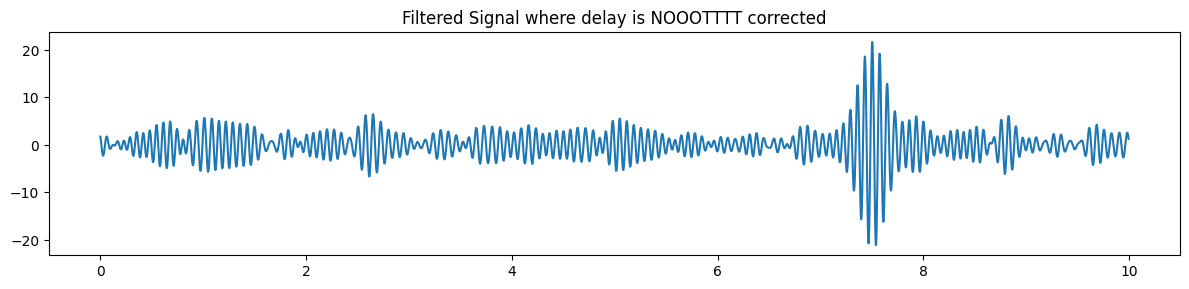

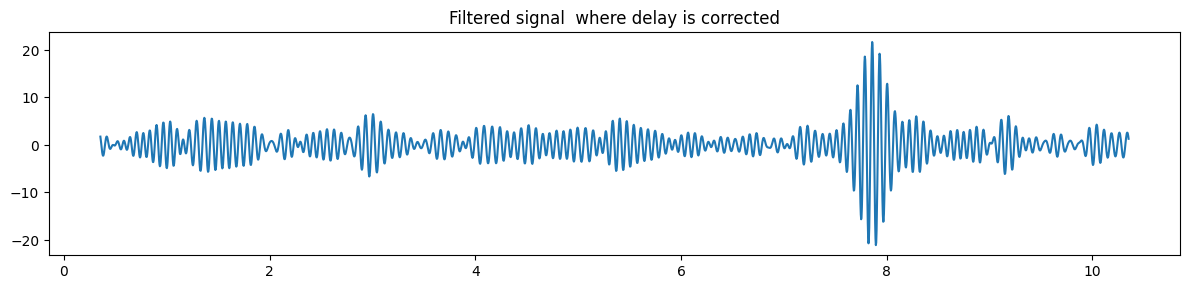

In [7]:
# Load data from file
import numpy as np
import matplotlib.pyplot as plt
data = loadmat('data/Lab4.mat', squeeze_me=True)
Fs = data['Fs']         
pulse = data['pulse']    
xn = data['xn_rx']    


tPulse = np.arange(len(pulse)) / Fs * 10**6  
tx = np.arange(len(xn_rx)) / Fs * 10**6     

yFiltered = np.convolve(xn, pulse[::-1], 'same') 
# When using 'same'  keeps the output length the same as the input length, but it centers the output.
# Threrefor we are dividing by 2 here: ((N - 1) / 2)

N = len(pulse)
offset = ((N - 1) / 2) * (1 / Fs) * 10**6  


tyFiltered = tx + offset


plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(tx, yFiltered)
plt.title(r'Filtered Signal where delay is NOOOTTTT corrected')
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(tyFiltered, yFiltered)

plt.title(r'Filtered signal  where delay is corrected')
plt.tight_layout()
plt.show()

[here](Figurer/task2a_lf.png) si an image showing what the filtered recieved signal may look like.

ANSWER THEORY QUESTIONS HERE:
Den reflekterte pulsformen befinner seg ved peaket/toppunket.

Matched filteret reduserer mye av støyen, serlig viss støyen ikke har en lignende form som signalet.

 
Noe av støyen forblir ofte likevell blant annet på grunn av relativ lik frekvens som signalet.

### b)
Use `python` to calculate the distance `dist` in meters to the reflective object by analyzing the filtered signal. Then, use graphical analysis to determine if your program interprets the filtered signal correctly, and provide an explain of how you calculated the distance when interpreting the figure in the markdown cell below.

Useful functions:
* `numpy.argmax()`
* `numpy.abs()`

PS: Remember that when designing the matched filter we applied a *time shift* of $N-1$ samples to ensure that the matched filter is *causal*, meaning that using the matched filter will add some delay to the output signal $y[n]$.
<!--
### b) 
Bruk `python` til å regne ut avstanden i meter til det reflekterende objektet ved å analysere det filtrerte signalet. Bruk deretter grafisk analyse for å avgjøre om programmet ditt tolker det filtrerte signalet riktig, og forklar hvordan du regnet deg frem til avstanden når du tolket figuren.

Nyttige funksoner:
* `numpy.argmax()`
* `numpy.abs()` -->

In [11]:
import numpy as np
data = loadmat('data/Lab4.mat', squeeze_me=True)
Fs = data['Fs']         
pulse = data['pulse']    
xn = data['xn_rx']    


c = 3 * 10**8 
N = len(pulse) 

peakIndex = np.argmax(yFiltered)

print(peakIndex)

print(f'(N - 1) = {(N - 1)}')

# applying the time-shift because must account for the length of the pulse
# dividing by 2 because of same


tauK = (peakIndex - (N - 1)/2 ) * (1 / Fs)

#(N - 1)/2 *

#Right answer = 
#2200
#(N - 1) = 199
#The estimated distance is :1071.9642857142858 meters.

dist = c * tauK / 2 #/ 2
print(f"The estimated distance is :{dist} meters.")


2101
(N - 1) = 199
The estimated distance is :1072.232142857143 meters.


In [12]:
from hashlib import sha1
assert sha1(str(round(float(dist), 0)).encode('utf-8')+b'78f94').hexdigest() == '82866a2aa908694609c50bb4517ae1894fb6be66', 'Wrong answer for dist :('
print('Correct answer for dist :)')

Correct answer for dist :)


ANSWER THEORY QUESTIONS HERE:


### Some final notes on matched filters and cross-correlation

It should be noted that what the matched filter in effect accomplishes is to calculate the cross-correlation $\hat{r}_{xs}[l]$ between the transmitted pulse $s[n]$ and the recieved signal $x[n]$. In fact, convolution and cross-correlation are very similar mathematical operations, and by rewriting the expression for $\hat{r}_{xs}[l]$ it is actually possible to define cross-correlation as a convolution operation:

$$
\begin{align}
\hat{r}_{xs}[l] &\propto \sum_{n} x[n]\cdot s[n-l] \\ 
&= \sum_{n} x[n] \cdot s[-(l-n)] \\ 
&= x[l] * s[-l]
\end{align}
$$

Here we see that the cross-correlation $\hat{r}_{xs}[l]$ between $s[n]$ and $x[n]$ can be calculated by covnolving $x[n]$ with a time-reversed copy of $s[n]$, which is precisely what we did when we designed the matched filter. 